In [117]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras import layers
import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import visualkeras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


print(tf.__version__)

2.13.1


In [118]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [119]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

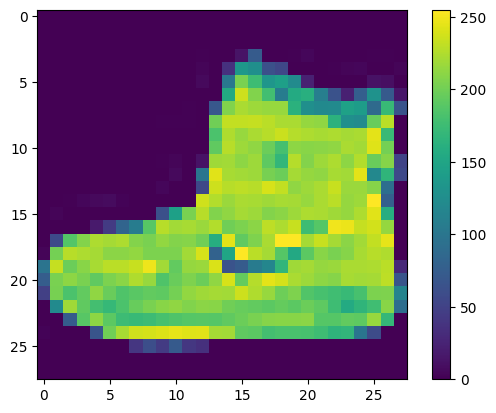

In [120]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [121]:
train_images = train_images / 255.0

test_images = test_images / 255.0

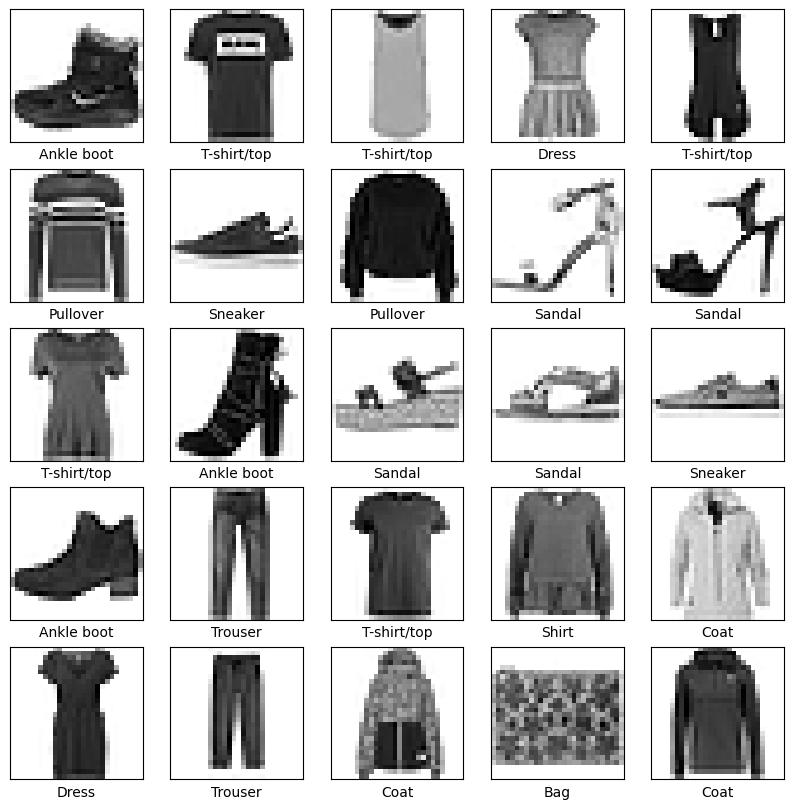

In [122]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [123]:
model = keras.Sequential([
    Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)), 
    MaxPooling2D(pool_size=2),
    # Dropout(0.3),
    Conv2D(32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    # Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    # Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.4083 - accuracy: 0.8523
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2733 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2277 - accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1985 - accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1728 - accuracy: 0.9348
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1476 - accuracy: 0.9451
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1294 - accuracy: 0.9518
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1114 - accuracy: 0.9581
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0939 - accuracy: 0.9649
Epoch 10/10
1875/1875 [==============================] - 29s 16m

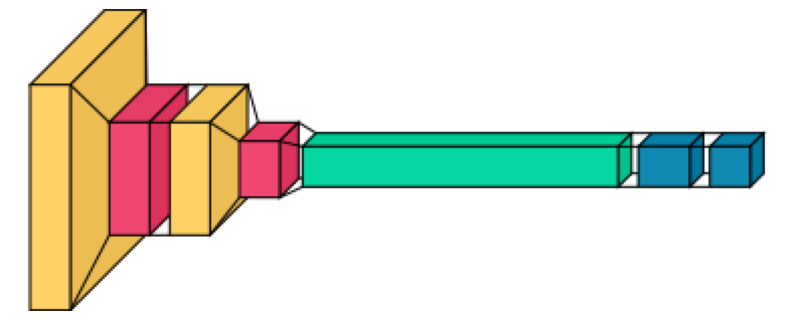

In [124]:
pil_img = visualkeras.layered_view(model)

img_array = np.array(pil_img)

plt.figure(figsize=(10, 10)) 
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [125]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3212 - accuracy: 0.9069 - 2s/epoch - 5ms/step

Test accuracy: 0.9068999886512756


In [126]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [127]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [128]:
predictions[0]

array([0.08533962, 0.08533962, 0.08533962, 0.08533962, 0.08533962,
       0.08533962, 0.08533962, 0.08535931, 0.08533962, 0.23192361],
      dtype=float32)

In [129]:
np.argmax(predictions[0])

9

In [130]:
test_labels[0]

9

In [131]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

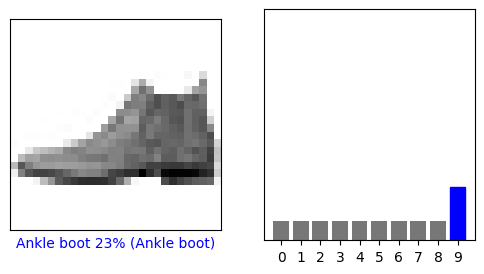

In [132]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

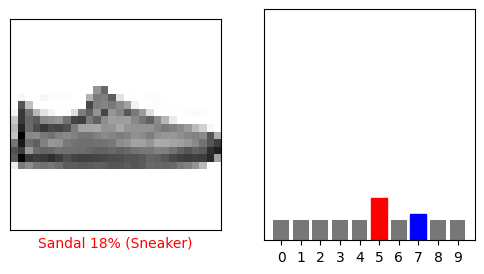

In [133]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

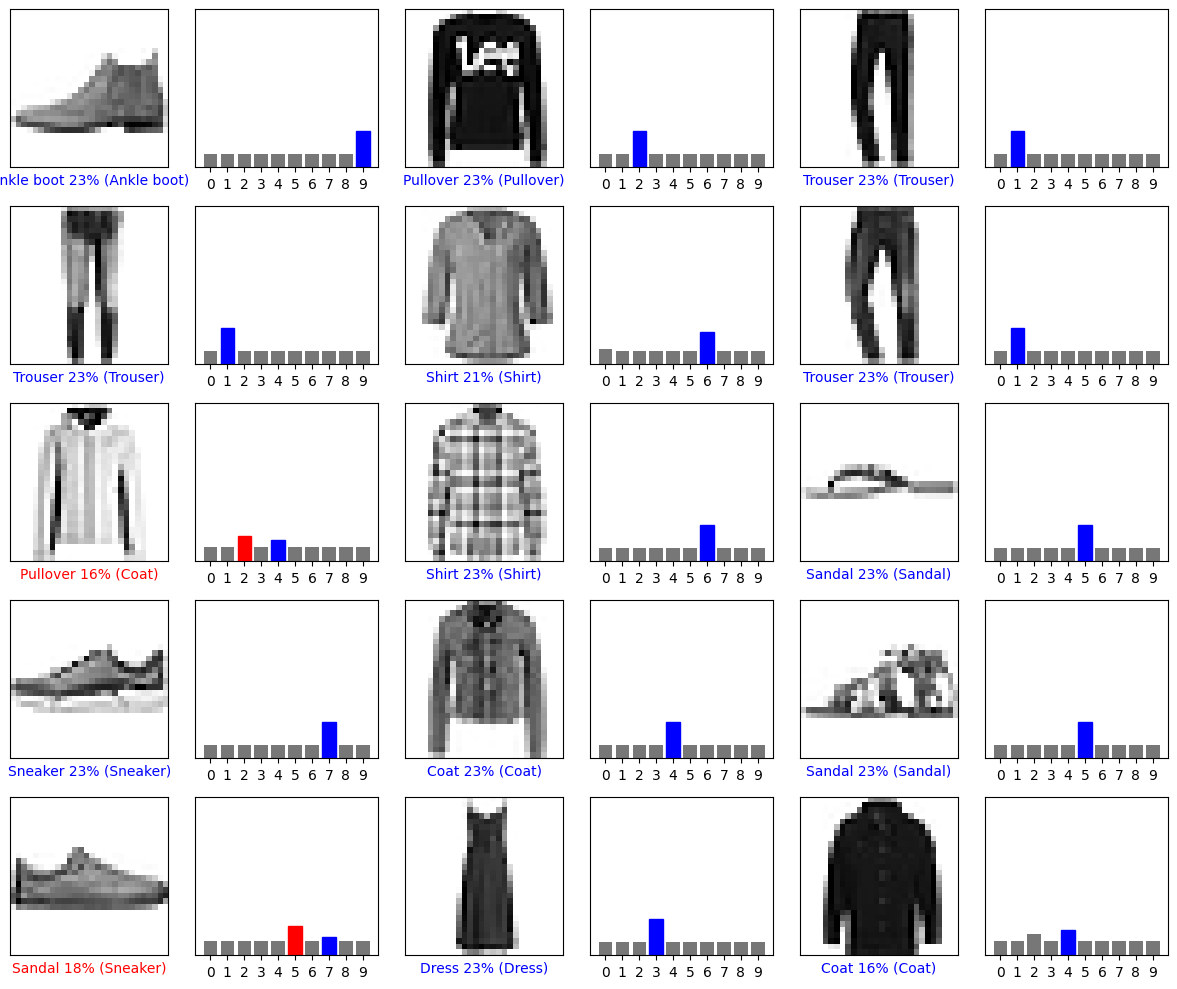

In [134]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [135]:
import pickle

model.save('../models/mnist_model_fashion.h5')

/home/lokman/anaconda3/envs/gemma/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
